In [25]:
import pandas as pd
import numpy as np

In [26]:
df=pd.read_csv('uci_student.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          649 non-null    int64 
 1   school      649 non-null    object
 2   sex         649 non-null    object
 3   age         649 non-null    int64 
 4   address     649 non-null    object
 5   famsize     649 non-null    object
 6   Pstatus     649 non-null    object
 7   Medu        649 non-null    int64 
 8   Fedu        649 non-null    int64 
 9   Mjob        649 non-null    object
 10  Fjob        649 non-null    object
 11  reason      649 non-null    object
 12  guardian    649 non-null    object
 13  traveltime  649 non-null    int64 
 14  studytime   649 non-null    int64 
 15  failures    649 non-null    int64 
 16  schoolsup   649 non-null    object
 17  famsup      649 non-null    object
 18  paid        649 non-null    object
 19  activities  649 non-null    object
 20  nursery   

In [27]:
# lets remove the id feature from df
df=df.drop('id',axis=1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [28]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [29]:
df.info()
print("\nBasic stats:")
print(df.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [30]:
target_col = "G3"


In [31]:
X = df.drop(columns=[target_col])
y = df[target_col]


In [32]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (649, 32)
Shape of y: (649,)


In [33]:
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

print("\nCategorical columns:")
print(categorical_cols)

print("\nNumeric columns:")
print(numeric_cols)



Categorical columns:
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

Numeric columns:
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


In [34]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Identify categorical and numeric columns specifically from the 'features' list
categorical_cols_for_model = [col for col in features if df[col].dtype == 'object']
numeric_cols_for_model = [col for col in features if df[col].dtype != 'object']

# 1. Transformer for categorical columns: convert text to 0/1 columns
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# 2. Transformer for numeric columns: scale to similar range
numeric_transformer = StandardScaler()

# 3. Column-wise preprocessing: apply different transforms to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_cols_for_model),
        ("num", numeric_transformer, numeric_cols_for_model),
    ]
)


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 4. Build full pipeline
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])


In [36]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['famsup', 'internet']),
                                                 ('num', StandardScaler(),
                                                  ['studytime', 'failures',
                                                   'absences', 'Dalc', 'Walc',
                                                   'goout'])])),
                ('model', LinearRegression())])

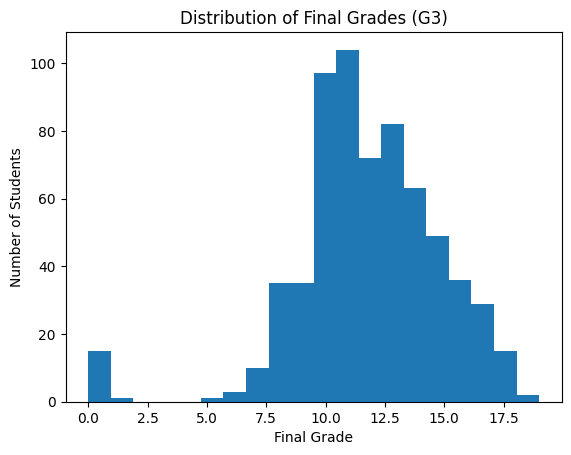

In [37]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df["G3"], bins=20)
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Number of Students")
plt.show()


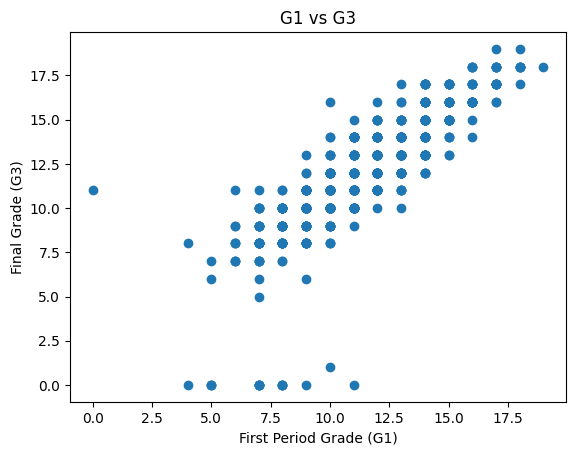

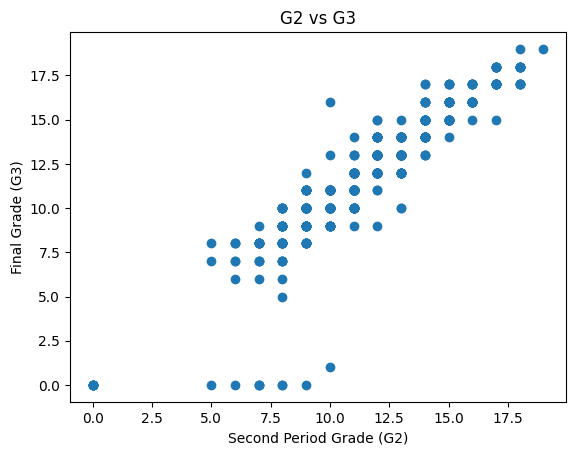

In [38]:
plt.figure()
plt.scatter(df["G1"], df["G3"])
plt.title("G1 vs G3")
plt.xlabel("First Period Grade (G1)")
plt.ylabel("Final Grade (G3)")
plt.show()

plt.figure()
plt.scatter(df["G2"], df["G3"])
plt.title("G2 vs G3")
plt.xlabel("Second Period Grade (G2)")
plt.ylabel("Final Grade (G3)")
plt.show()


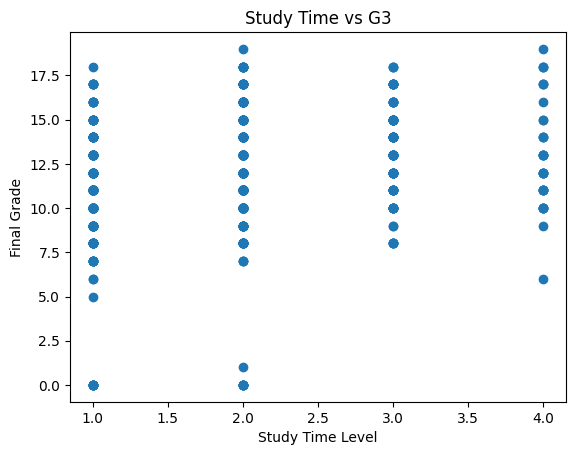

In [39]:
plt.figure()
plt.scatter(df["studytime"], df["G3"])
plt.title("Study Time vs G3")
plt.xlabel("Study Time Level")
plt.ylabel("Final Grade")
plt.show()


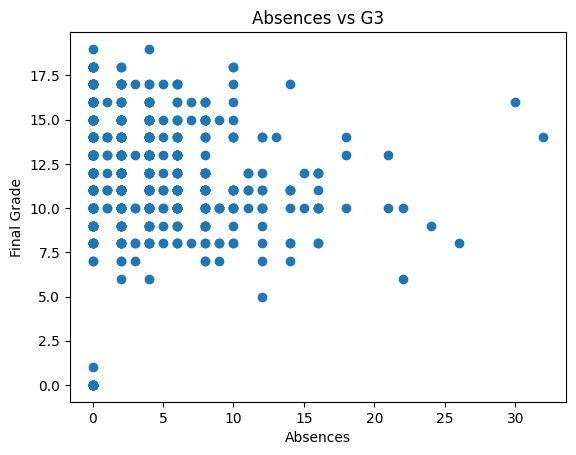

In [40]:
plt.figure()
plt.scatter(df["absences"], df["G3"])
plt.title("Absences vs G3")
plt.xlabel("Absences")
plt.ylabel("Final Grade")
plt.show()


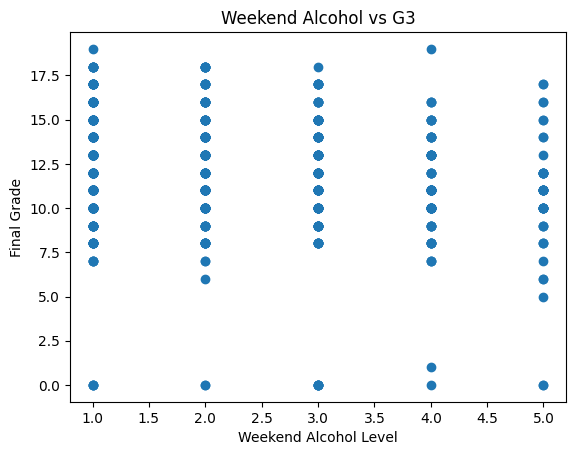

In [41]:
plt.figure()
plt.scatter(df["Walc"], df["G3"])
plt.title("Weekend Alcohol vs G3")
plt.xlabel("Weekend Alcohol Level")
plt.ylabel("Final Grade")
plt.show()


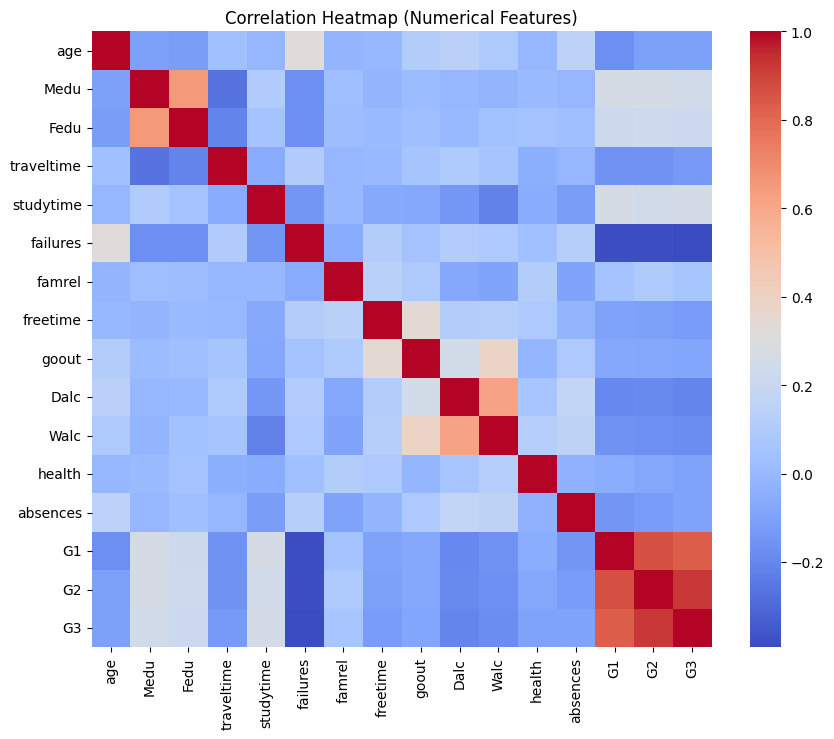

In [42]:
import seaborn as sns

numeric_df = df[numeric_cols + ["G3"]]

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


In [43]:
df["pass_fail"] = (df["G3"] >= 10).astype(int)

print(df["pass_fail"].value_counts())

pass_fail
1    549
0    100
Name: count, dtype: int64


In [44]:
# Selected “social + habit” inputs

features = [
    "studytime",
    "failures",
    "absences",
    "Dalc",
    "Walc",
    "famsup",
    "internet",
    "goout"
]

X = df[features]
y = df["pass_fail"]


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [46]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['famsup', 'internet']),
                                                 ('num', StandardScaler(),
                                                  ['studytime', 'failures',
                                                   'absences', 'Dalc', 'Walc',
                                                   'goout'])])),
                ('model', LinearRegression())])

In [49]:
from sklearn.metrics import accuracy_score
import numpy as np

# Use the full pipeline for prediction to ensure data is preprocessed
preds_continuous = clf.predict(X_val)

# Convert continuous predictions to binary (0 or 1) using a threshold
preds = (preds_continuous >= 0.5).astype(int)

accuracy = accuracy_score(y_val, preds)

print("Baseline Linear Regression Accuracy:", accuracy)


Baseline Linear Regression Accuracy: 0.8923076923076924


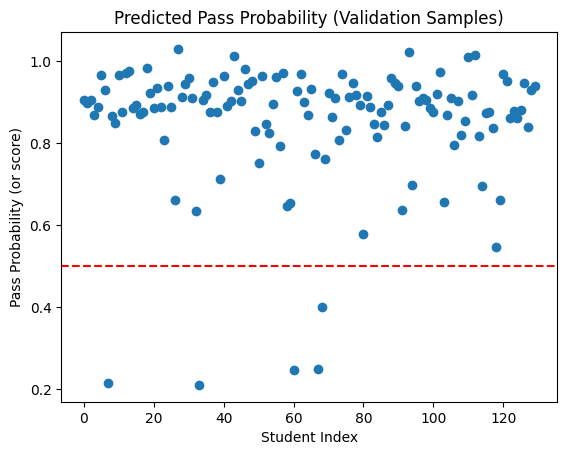

In [50]:
import matplotlib.pyplot as plt

# Get predicted probabilities for "Pass"
# Using preds_continuous from the previous cell as LinearRegression doesn't have predict_proba
probs = preds_continuous

# Scatter plot
plt.figure()
plt.scatter(range(len(probs)), probs)
plt.axhline(0.5, color='r', linestyle='--')   # Decision threshold
plt.title("Predicted Pass Probability (Validation Samples)")
plt.xlabel("Student Index")
plt.ylabel("Pass Probability (or score)")
plt.show()


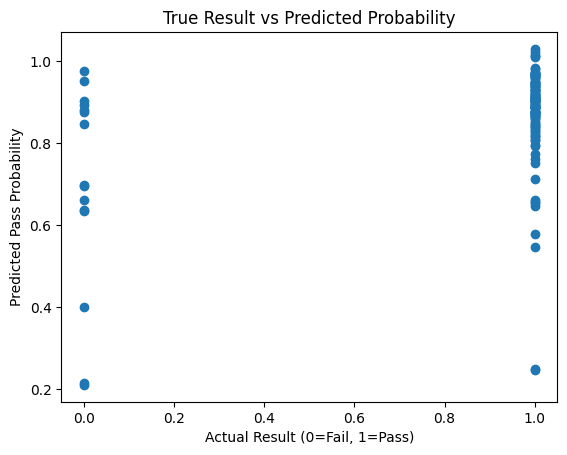

In [51]:
# Convert predictions to class labels
pred_labels = preds_continuous

plt.figure()
plt.scatter(y_val, probs)
plt.title("True Result vs Predicted Probability")
plt.xlabel("Actual Result (0=Fail, 1=Pass)")
plt.ylabel("Predicted Pass Probability")
plt.show()


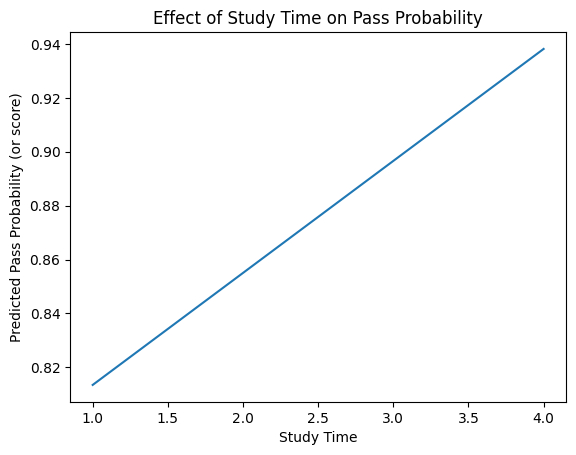

In [54]:
import numpy as np

# Create a clean range for studytime
study_range = np.linspace(df["studytime"].min(), df["studytime"].max(), 100)

# Build fake dataset where only studytime changes
X_vis = pd.DataFrame({
    "studytime": study_range,
    "failures": df["failures"].mean(),
    "absences": df["absences"].mean(),
    "Dalc": df["Dalc"].mean(),
    "Walc": df["Walc"].mean(),
    "goout": df["goout"].mean(),
    "famsup": "yes",
    "internet": "yes",
})

# Predict probabilities (or continuous scores)
probs_line = clf.predict(X_vis)

plt.figure()
plt.plot(study_range, probs_line)
plt.title("Effect of Study Time on Pass Probability")
plt.xlabel("Study Time")
plt.ylabel("Predicted Pass Probability (or score)")
plt.show()


In [55]:
from sklearn.linear_model import LogisticRegression

log_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

log_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = log_clf.predict(X_val)

print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification report:\n", classification_report(y_val, y_pred))


Logistic Regression Accuracy: 0.8153846153846154

Confusion matrix:
 [[ 8  7]
 [17 98]]

Classification report:
               precision    recall  f1-score   support

           0       0.32      0.53      0.40        15
           1       0.93      0.85      0.89       115

    accuracy                           0.82       130
   macro avg       0.63      0.69      0.65       130
weighted avg       0.86      0.82      0.83       130



In [56]:
from sklearn.tree import DecisionTreeClassifier

deep_tree = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier(random_state=42))  # no depth limit = chaos
])

deep_tree.fit(X_train, y_train)

train_pred = deep_tree.predict(X_train)
val_pred = deep_tree.predict(X_val)

from sklearn.metrics import accuracy_score

print("Deep Tree Train Accuracy :", accuracy_score(y_train, train_pred))
print("Deep Tree Val Accuracy   :", accuracy_score(y_val, val_pred))


Deep Tree Train Accuracy : 0.9865125240847784
Deep Tree Val Accuracy   : 0.8


In [57]:
shallow_tree = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier(max_depth=3, random_state=42))
])

shallow_tree.fit(X_train, y_train)

train_pred_shallow = shallow_tree.predict(X_train)
val_pred_shallow = shallow_tree.predict(X_val)

print("Shallow Tree Train Accuracy:", accuracy_score(y_train, train_pred_shallow))
print("Shallow Tree Val Accuracy  :", accuracy_score(y_val, val_pred_shallow))


Shallow Tree Train Accuracy: 0.8554913294797688
Shallow Tree Val Accuracy  : 0.8384615384615385


In [58]:
# Split by school
gp_df = df[df["school"] == "GP"]
ms_df = df[df["school"] == "MS"]

# Use the same features
X_gp = gp_df[features]
y_gp = gp_df["pass_fail"]

X_ms = ms_df[features]
y_ms = ms_df["pass_fail"]

# Train on GP only
X_train_gp, X_val_gp, y_train_gp, y_val_gp = train_test_split(
    X_gp, y_gp, test_size=0.2, random_state=42
)

log_clf_gp = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

log_clf_gp.fit(X_train_gp, y_train_gp)

# Test on GP (in-domain)
pred_gp_in = log_clf_gp.predict(X_val_gp)
print("Accuracy on GP (same school):", accuracy_score(y_val_gp, pred_gp_in))

# Test on MS (out-of-domain)
pred_gp_on_ms = log_clf_gp.predict(X_ms)
print("Accuracy when trained on GP, tested on MS:", accuracy_score(y_ms, pred_gp_on_ms))


Accuracy on GP (same school): 0.8235294117647058
Accuracy when trained on GP, tested on MS: 0.6858407079646017


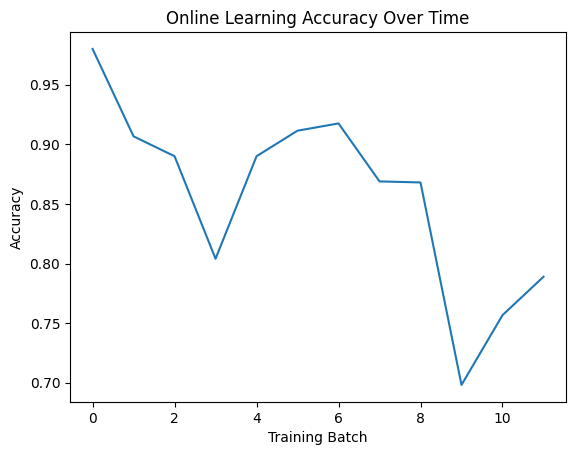

In [59]:
# online learning

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Convert to numpy arrays
X_stream = preprocessor.fit_transform(X)
y_stream = y.values

# Streaming batches
batch_size = 50

online_model = SGDClassifier(loss="log_loss")

accuracies = []

# Initialize with first batch
online_model.partial_fit(
    X_stream[:batch_size],
    y_stream[:batch_size],
    classes=np.array([0,1])
)

# Incremental training
for i in range(batch_size, len(X_stream), batch_size):
    end = i + batch_size

    online_model.partial_fit(
        X_stream[i:end],
        y_stream[i:end]
    )

    preds = online_model.predict(X_stream[:end])
    acc = accuracy_score(y_stream[:end], preds)
    accuracies.append(acc)

# Plot regret / accuracy curve
plt.figure()
plt.plot(accuracies)
plt.title("Online Learning Accuracy Over Time")
plt.xlabel("Training Batch")
plt.ylabel("Accuracy")
plt.show()


In [61]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# -------------------------------
# 1. Logistic Regression
# -------------------------------

log_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_val)
log_acc = accuracy_score(y_val, log_pred)

print("Logistic validation accuracy:", log_acc)



# -------------------------------
# 2. Deep Decision Tree
# -------------------------------

deep_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier(random_state=42))
])

deep_model.fit(X_train, y_train)
deep_val_pred = deep_model.predict(X_val)
deep_val_acc = accuracy_score(y_val, deep_val_pred)

print("Deep Tree validation accuracy:", deep_val_acc)



# -------------------------------
# 3. Shallow Decision Tree
# -------------------------------

shallow_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier(max_depth=3, random_state=42))
])

shallow_model.fit(X_train, y_train)
shallow_val_pred = shallow_model.predict(X_val)
shallow_val_acc = accuracy_score(y_val, shallow_val_pred)

print("Shallow Tree validation accuracy:", shallow_val_acc)



# -------------------------------
# 4. Cross-School Generalization
# -------------------------------

gp_df = df[df["school"] == "GP"]
ms_df = df[df["school"] == "MS"]

X_gp = gp_df[features]
y_gp = gp_df["pass_fail"]

X_ms = ms_df[features]
y_ms = ms_df["pass_fail"]

X_train_gp, X_val_gp, y_train_gp, y_val_gp = train_test_split(
    X_gp, y_gp, test_size=0.2, random_state=42
)

school_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

school_model.fit(X_train_gp, y_train_gp)

cross_pred = school_model.predict(X_ms)
cross_school_acc = accuracy_score(y_ms, cross_pred)

print("Cross-school accuracy (train GP → test MS):", cross_school_acc)



# -------------------------------
# 5. Online Learning Accuracy
# -------------------------------

final_online_acc = accuracies[-1]   # from your streaming experiment

print("Online final batch accuracy:", final_online_acc)


Logistic validation accuracy: 0.8153846153846154
Deep Tree validation accuracy: 0.8
Shallow Tree validation accuracy: 0.8384615384615385
Cross-school accuracy (train GP → test MS): 0.6858407079646017
Online final batch accuracy: 0.7889060092449923


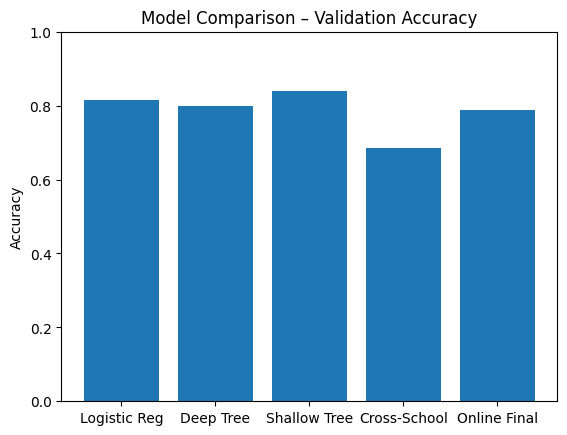

In [62]:
import matplotlib.pyplot as plt

model_names = [
    "Logistic Reg",
    "Deep Tree",
    "Shallow Tree",
    "Cross-School",
    "Online Final"
]

accuracies_plot = [
    log_acc,
    deep_val_acc,
    shallow_val_acc,
    cross_school_acc,
    final_online_acc
]

plt.figure()
plt.bar(model_names, accuracies_plot)
plt.ylim(0, 1)
plt.title("Model Comparison – Validation Accuracy")
plt.ylabel("Accuracy")
plt.show()
